Hi Pablo. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Scientist. But if you can't handle this task yet , I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1

Thank you for sending your project. You've done a really good job on it! While there's room for improvement, on the whole, your project is looking good. There are few things that need to be corrected in your project. They're mostly minor issues that are easy to fix. There are also some comments for improvement. They don’t mean that you’ve done anything wrong, but they’re things we wanted to point out that can help you further develop your skills. Every issue with our code is a chance for us to learn something new.

## Review v. 2

Could you please fix the error in the code?

## Review v. 3

You've worked hard and now your project is perfect! Your project has been accepted and you can go to the next sprint! Good luck on the next sprint!

## Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

### Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

### Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
It’s great that you described the project, but it will be nice to add a table of contents with links.
</div>

## Question!

## I don't understand this frase: ***combine train and valid into new_train, retrain on new_train and then predict on test***
## I am not  sure at all about the process of splitting the data, Could you please give me a hand?
## Thanks 

<div class="alert alert-info" role="alert">
Reviewer's comment v. 1:
    
You need to split data into three (train, validation and test) datasets or two datasets (in case of crocc-validation).
    
Please see this links for details: https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8, https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4 
</div>

# 1. Preparation the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller

According to what was demanded, we should have to take into account that we got two columns and one of them (dates) should be prepared as a datetime format and set as index in our table. After that we resample teh dates by one hour

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data.resample('1H').sum()

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, data has been resampled.
</div>

# 2. Analyze the data.

We have to investigate how our data is presented

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
num_orders    4416 non-null int64
dtypes: int64(1)
memory usage: 69.0 KB


Now, we got dates grouped by one houe and the dates was registered from 2018-03-01 00:00:00 to 2018-08-31 23:00:00. Of course, we dont have missing data in our dataset

In [4]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [5]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that you can avoid warnings (if necessary) by using the code below.
</div>

In [6]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

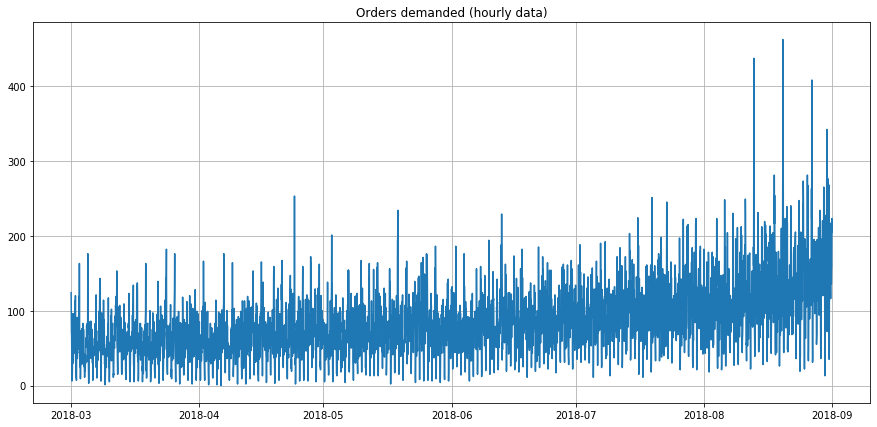

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(data['num_orders'])
plt.title('Orders demanded (hourly data)')
plt.grid(True)
plt.show()

This plot shows a time series that appears to be a stationary until the date from 2018-06 where it mantains mean and variance,then the mean values increases as its variance also does.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that you can avoid "<matplotlib.axes._subplots.AxesSubplot at 0x7f341090ced0>" by using ";" after code lines with graph.
</div>

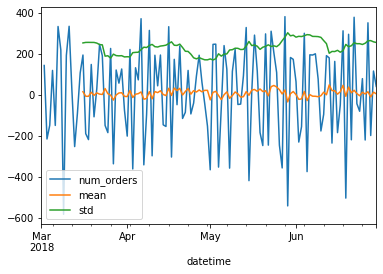

In [8]:
data_shorted = data['2018-03':'2018-06'].resample('1D').sum()
data_shorted = data_shorted-data_shorted.shift()
data_shorted['mean'] = data_shorted['num_orders'].rolling(15).mean()
data_shorted['std'] = data_shorted['num_orders'].rolling(15).std()
data_shorted.plot()

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Well done that you added x axis label, but please the title and the y axis.
</div>

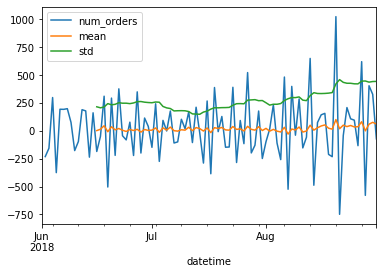

In [9]:
data_shorted2 = data['2018-06':'2018-08'].resample('1D').sum()
data_shorted2 = data_shorted2-data_shorted2.shift()
data_shorted2['mean'] = data_shorted2['num_orders'].rolling(15).mean()
data_shorted2['std'] = data_shorted2['num_orders'].rolling(15).std()
data_shorted2.plot()

In [10]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

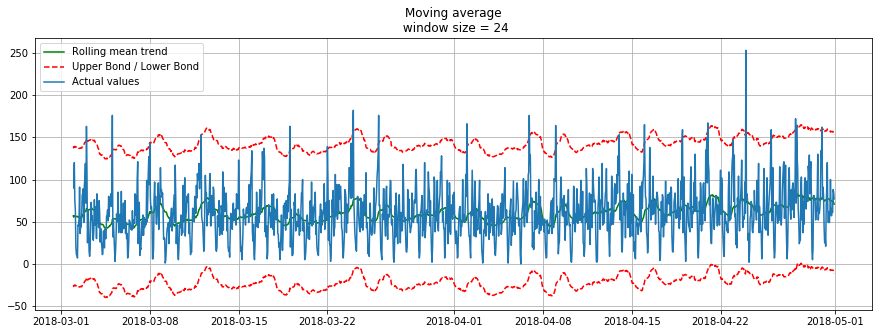

In [11]:
plotMovingAverage(data['2018-03':'2018-04'], 24, plot_intervals=True) 

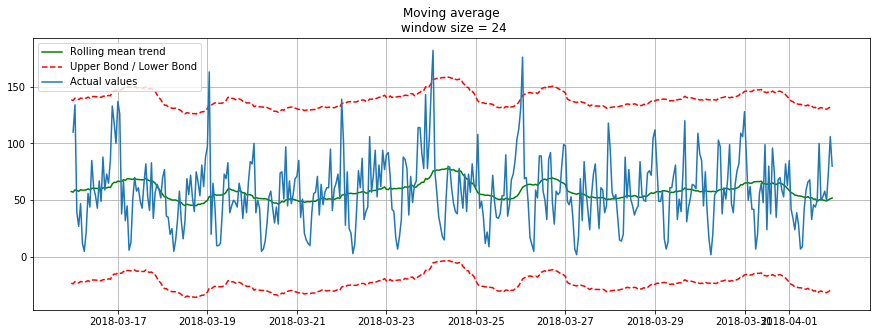

In [12]:
plotMovingAverage(data['2018-03-15':'2018-04-01'], 24, plot_intervals=True) 

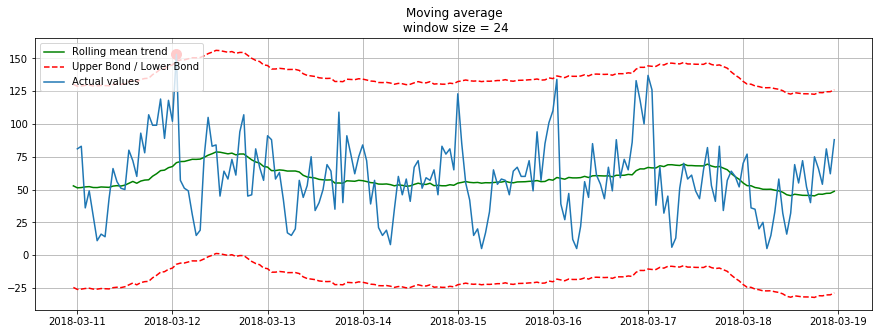

In [13]:
plotMovingAverage(data['2018-03-10':'2018-03-18'], 24, plot_intervals=True,  plot_anomalies=True) 


After proving many windows through days, we found that applying daily smoothing on hourly data, we could clearly see the dynamics of number of orders.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent graphs :)
    
Additional link: https://www.machinelearningplus.com/time-series/time-series-analysis-python/, https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
</div>

Now, after having a look of the series, we should focus on the descomposition of the time series

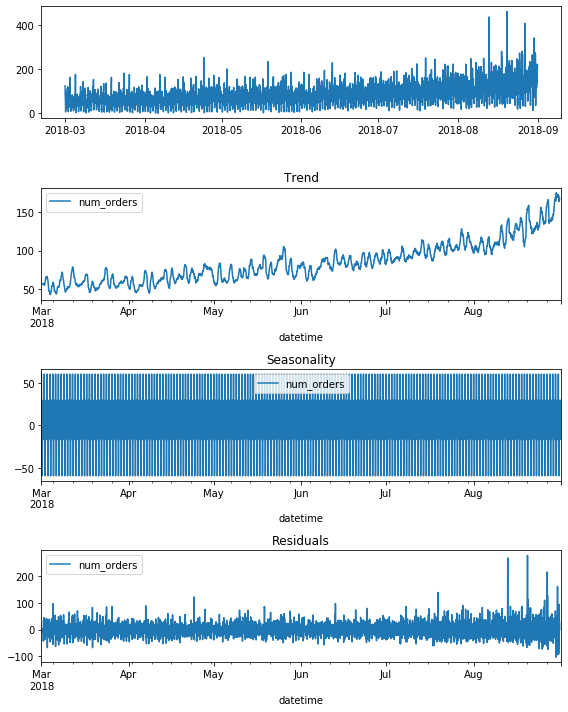

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(8, 10))


plt.subplot(411)
plt.plot(data, label = 'Original')
plt.subplot(412)
decomposition.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(413)
decomposition.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(414)
decomposition.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()   

A general view of the series, we cannot determine the seasonality of the series, but the trend the is increasingly getting higher. But it is no clear, so we should catch certain intervals

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we have trend.
</div>

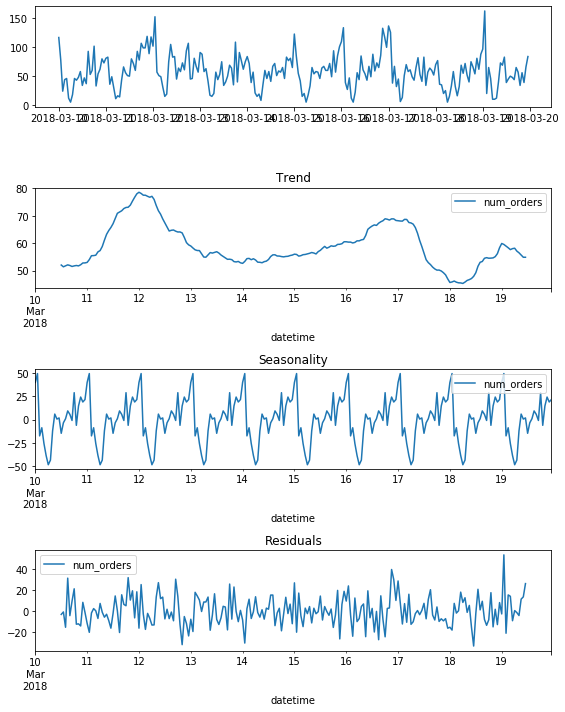

In [15]:
plt.figure(figsize=(8, 10))

interval_1= data['2018-03':'2018-04']
interval_2 = data['2018-03-10':'2018-03-19']
decomposition = seasonal_decompose(interval_2)

plt.subplot(411)
plt.plot(interval_2, label = 'Original')
plt.subplot(412)
decomposition.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(413)
decomposition.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(414)
decomposition.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()   

If we want to check if it is a stationary processw we will use Dickey–Fuller test to prove it. First with all the data recopilated

In [16]:
series = data.loc[:, 'num_orders'].values
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.068924289027946
n_lags: 0.02894005140261368
p-value: 0.02894005140261368


The p-value is obtained is lower than significance level of 0.05, so we can reject the null hypothesis and we can say that this time series is stationary

In case of short interval we obtain a different pvalue and it is more significance

In [17]:
series = interval_2.loc[:, 'num_orders'].values
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

ADF Statistic: -6.628314956652046
n_lags: 5.800243497301957e-09
p-value: 5.800243497301957e-09


Finally, we got the a seasonality defined in an interval which comprises days of difference with a rolling of 24 hours

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:

Please check does time series is stationary or not. Please note that you can use Dickey–Fuller test to check it.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you checked stationarity.
</div>

# 3. Training different models

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline

We configure the features attending to number of previous and rolling mean

In [19]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


make_features(data, 6, 24)


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, features have been created.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please divide data into three parts (train, validation and test).
</div>

In [20]:
data.dropna(inplace=True)
features = data.drop(['num_orders'], axis=1)
target = data['num_orders']

Mark our features and target

We try different models to choose which one offers a better RMSE metric. Without using suffle method, we divide the dataset in train, valid and test sets

In [21]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_test, target_train, target_test = train_test_split(features_train, target_train, test_size=0.2, random_state=12345)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok, data is splitted.
</div>

We have choosen these basic models. First look at the models and check them

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 2:
    
Please fix the error below (code doesn't run).
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Great now it works :)
</div>

In [22]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(features_train, target_train)

forest = RandomForestRegressor(n_jobs=-1)
forest.fit(features_train, target_train)

lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(features_train, target_train)

LinearRegression(n_jobs=-1)

Test them on valid data

In [23]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
for i, model in models:    
    predictions = model.predict(features_valid)

    MSE = mean_squared_error(target_valid, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 33.23
RMSE of random forest = 32.27
RMSE of decision tree = 43.70


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that you can use .format to output only required number of decimal places (https://pyformat.info/ ).
</div>

It seems that our purpose is completed and we get models metrics lower than target value (RMSE=48). Let's compare different models

In [24]:
from sklearn.model_selection import cross_validate
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error']

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, features_valid, target_valid, scoring=i, cv=10, return_train_score=True)
        results.append(scores)
        
        

In [25]:
np.sqrt(-results[0]['test_score'])

array([28.76744045, 32.37423428, 36.69240193, 32.27646216, 35.25470525,
       33.30772025, 32.51889941, 29.46922486, 33.3023972 , 39.58275664])

In [26]:
np.sqrt(-results[1]['test_score'])

array([27.68230535, 32.15785536, 35.70029011, 30.79488013, 37.49968751,
       32.02756066, 32.36802054, 28.97455514, 31.73194787, 38.85994281])

In [27]:
np.sqrt(-results[2]['test_score'])

array([50.03317082, 41.06715675, 47.03323293, 44.7448575 , 56.4210027 ,
       43.44602189, 50.16053773, 45.14849237, 44.47688368, 43.75033662])

At this time, the models nhose results fit better for our metric RMSE are RandomForest and Linear Regression, but it's not definitive and we should go further and evaluate our models

Let's tunning hyperparameter. We will use GridSearchCV for finding the best aprameters

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Finding the best parameters is a good idea :)
</div>

### RandomForest

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(features_valid, target_valid)

cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
grid_search_forest.best_params_

34.414919339595265 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
33.90337013972689 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
34.42906142085948 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
33.31968539834785 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
34.4137339195909 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
33.587902597181376 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
35.55161994216321 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
33.13787550805034 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
34.4351193211139 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
32.49354127801076 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
34.13653059029142 {'bootstrap': True, 'max_depth': N

{'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}

Best estimator for this metric

### DecisionTreeRegressor

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please fix the error below (code doesn't run).
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Ok, fixed :)
</div>

In [29]:
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=1))
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]
gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring="neg_mean_squared_error", cv=10)
gs = gs.fit(features_valid, target_valid)
print(np.sqrt(-gs.best_score_))
print(gs.best_params_)

34.86730567231033
{'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__min_samples_leaf': 10}


# 4. Testing

Combine train and valid into new_train, retrain on new_train and then predict on test

### LinearRegression

In [30]:
linear_model = LinearRegression()
linear_model.fit(features_train, target_train)
predicted_test = linear_model.predict(features_test)
rmse= np.sqrt(mean_squared_error(target_test,predicted_test))
print("RMSE: %f" % (rmse))

RMSE: 33.375502


<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Please note that you can use .format to output only required number of decimal places (https://pyformat.info/ ).
</div>

### RandomForest evaluate

In [31]:
grid_best= grid_search_forest.best_estimator_
grid_best.fit(features_train, target_train)
y_predicted = grid_best.predict(features_test)
grid_mse = mean_squared_error(target_test, y_predicted)
grid_rmse = np.sqrt(grid_mse)
print('The best RandomForest model from the grid search has a RMSE of', round(grid_rmse, 2))

The best RandomForest model from the grid search has a RMSE of 31.43


### DecisionTree evaluate

In [32]:
my_model = gs.best_estimator_
my_model.fit(features_train, target_train)
y_predicted = my_model.predict(features_test)
grid_mse = mean_squared_error(target_test, y_predicted)
grid_rmse = np.sqrt(grid_mse)
print('The best DecisionTree model from the grid search has a RMSE of', round(grid_rmse, 2))

The best DecisionTree model from the grid search has a RMSE of 34.65


<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Additional link (metrics): https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234 
</div>

# Conclusion

To sum up, the best model to predict according to the RMSE metric and after evaluating different models, it is the RandomForest whose RMSE is the lowest one (27.01) and all the models mmet with the condition of a RMSE lower than 48

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent conclusion which highlights all the main results of the project. But maybe results will change after correct data splitting.
</div>

# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48